In [5]:
include("../../src/Simulator.jl")

In [6]:
#Number of epochs to be simulated
n_epochs = 800000

#The type of Proof-of-Stake: Weighted, OppositeWeighted, GiniStabilized
proof_of_stake = GiniStabilized

#The initial volume of stakes in the pool
initial_stake_volume = 50000.0

#The initial distribution of tokens: Uniform, Gini, Random
initial_distribution = Gini

#The initial value of Gini distribution (in case it has been chosen)
initial_gini = 0.5

#The number of peers (or validators) in the blockchain
n_peers = 10000

#The number of corrupted peers (or validators) in the blockchain
n_corrupted = 10

#The probability that, in case a corrupted validator is chosen, it fails to validate the blockchain
p_fail = 0.5

#Probability of a new peer to join the pool at any epoch
p_join = 0.001

#Probability of a peer to quit the pool at any epoch
p_leave = 0.001

#The amount of tokens owned by the new peer
join_amount = NewRandom

#Percentage of coins removed from the corrupted validator in case he fails to validate the block
penalty_percentage = 0.5

#Constant reward earned by the validator
reward = 10.0
;

Since we are using GiniStabilized PoS, we add the following parameters

In [7]:
#Type of 's', to be set in case of GiniStabilized PoS. Choose between 'Constant' and 'Linear'
s_type = Constant

#Value of s. In case Constant has been chosen, 's' will be used, (abs(g - θ) * s_val) otherwise
s_val = 1 / 1000.0

#Target value for GiniStabilized PoS
θ = 0.3

0.3

We set 's' to 1 / 100. We therefore DO NOT expect the so-called zig-zag effect

In [8]:
#I create a basic set of parameters
parameters = Parameters()

#And i customize it with the ones written above
parameters.n_epochs = n_epochs
parameters.n_peers = n_peers
parameters.n_corrupted = n_corrupted
parameters.p_fail = p_fail
parameters.p_join = p_join
parameters.p_leave = p_leave
parameters.proof_of_stake = proof_of_stake
parameters.initial_stake_volume = initial_stake_volume
parameters.initial_distribution = Gini
parameters.initial_gini = initial_gini
parameters.join_amount = join_amount
parameters.penalty_percentage = penalty_percentage
parameters.reward = reward
parameters.s_type = s_type
parameters.s_val = s_val
parameters.θ = θ

parameters

Parameters(800000, GiniStabilized, 50000.0, Gini, 0.5, 10000, 10, 0.5, 0.001, 0.001, NewRandom, 0.5, 0.3, Constant, 0.001, 10.0)

In [10]:
history_collection = ThreadSafeDict()

simulations = 1

starting_ginis = [0.01, 0.2, 0.4, 0.6, 0.8]

@Threads.threads for i in 1:size(starting_ginis)[1]
    stakes = generate_peers(parameters.n_peers, 
                            parameters.initial_stake_volume, 
                            parameters.initial_distribution, 
                            starting_ginis[i]);
                            
    
    history_collection[i] = simulate(stakes, parameters);
end

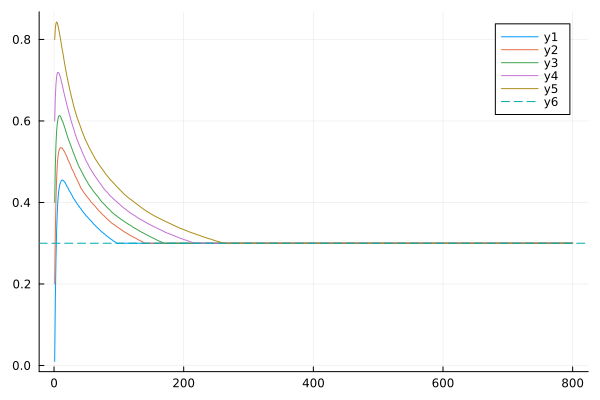

In [24]:
plot(history_collection[1][1:1000:end])
plot!(history_collection[2][1:1000:end])
plot!(history_collection[3][1:1000:end])
plot!(history_collection[4][1:1000:end])
plot!(history_collection[5][1:1000:end])

hline!([0.3], linestyle=:dash)

Let's zoom a little bit (we concentrate on a single run for visualization reasons, feel free to un-comment)

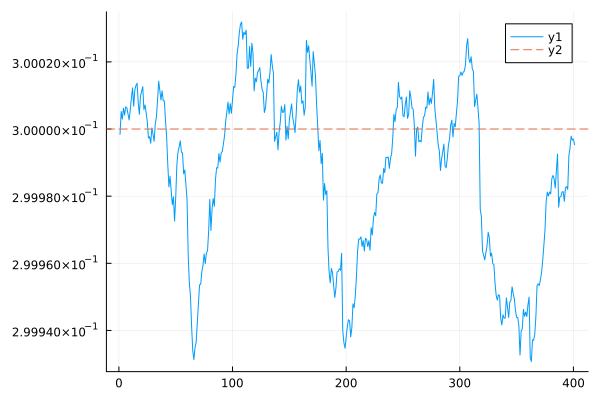

In [36]:
plot(history_collection[1][420000:10:424000])#, ylim=(0.3-0.001, 0.3+0.001))
#plot!(history_collection[2][420100:1:420200])
#plot!(history_collection[3][420100:1:420200])
#plot!(history_collection[4][420100:1:420200])
#plot!(history_collection[5][420100:1:420200])
hline!([0.3], linestyle=:dash)

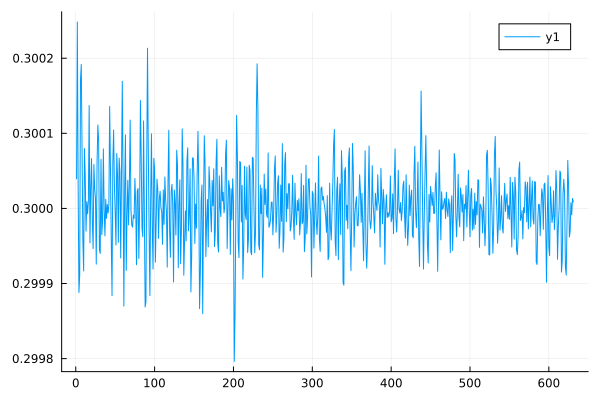

In [41]:
plot(history_collection[1][185000:500:500000])

In [43]:
using DelimitedFiles

# Export the vector to a text file
writedlm("results/e1.txt", history_collection[1][1:1000:end])
writedlm("results/e2.txt", history_collection[2][1:1000:end])
writedlm("results/e3.txt", history_collection[3][1:1000:end])
writedlm("results/e4.txt", history_collection[4][1:1000:end])
writedlm("results/e5.txt", history_collection[5][1:1000:end])

writedlm("results/e1zoom.txt", history_collection[1][420000:10:424000])


writedlm("results/e1zoomlarge.txt", history_collection[1][185000:500:500000])